# CS456 Final

### Question: Based on Regional sales, can we determine a meaningful cluster of titles?
> KMeans/KNN visualizations #3

### Can we predict a games ranking based on its Regional sales sales?
> Naive Bayes #2

### Question: What do the trends in game sales each year based on global sales show?
> Temporal Trends #6

# Data Cleaning and Statistics

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [107]:
df = pd.read_csv('vgsales.csv')

In [108]:
df = df = df.drop(columns= 'Unnamed: 0')

In [109]:
df

,Rank,Name,Platform,Year,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,11,The Sims,Series,2000.0,Electronic Arts,Maxis,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,Final Fantasy,Series,1987.0,Square,Square,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13,Grand Theft Auto V,All,2013.0,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,Mario Kart,Series,1992.0,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,Need for Speed,Series,1994.0,Electronic Arts,EA Black Box,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56060,62474,Zombieland: Double Tap - Road Trip,PC,2019.0,GameMill Entertainment,High Voltage Software,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56061,62475,Zombillie,NS,2018.0,Forever Entertainment S.A.,Forever Entertainment S.A.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56062,62476,Zone of the Enders: The 2nd Runner MARS,PC,2018.0,Konami,Cygames,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56063,62477,Zoo Tycoon: Ultimate Animal Collection,XOne,2017.0,Microsoft Studios,Frontier Developments,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
# Check our NaN cells
df.isna().sum()

Rank                0
Name                0
Platform            0
Year                0
Publisher           0
Developer           0
Critic_Score    49610
User_Score      55676
NA_Sales        42587
PAL_Sales       42253
JP_Sales        48511
Other_Sales     39939
Global_Sales    36081
dtype: int64

# Based on Regional sales, can we determine a meaningful cluster of titles?

In [111]:
df_clean = df.dropna(subset=['Global_Sales'])
df_clean = df.dropna(subset=['NA_Sales'])
df_clean = df.dropna(subset=['PAL_Sales'])
df_clean = df.dropna(subset=['JP_Sales'])

In [112]:
df_clean['NA_Sales'] = pd.to_numeric(df_clean['NA_Sales'], errors='coerce')
df_clean['Global_Sales'] = pd.to_numeric(df_clean['Global_Sales'], errors='coerce')

C:\Users\MaxSh\AppData\Local\Temp\ipykernel_10512\3148258191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['NA_Sales'] = pd.to_numeric(df_clean['NA_Sales'], errors='coerce')
C:\Users\MaxSh\AppData\Local\Temp\ipykernel_10512\3148258191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Global_Sales'] = pd.to_numeric(df_clean['Global_Sales'], errors='coerce')


In [113]:
numeric = df.select_dtypes(include=['int64', 'float64']).columns

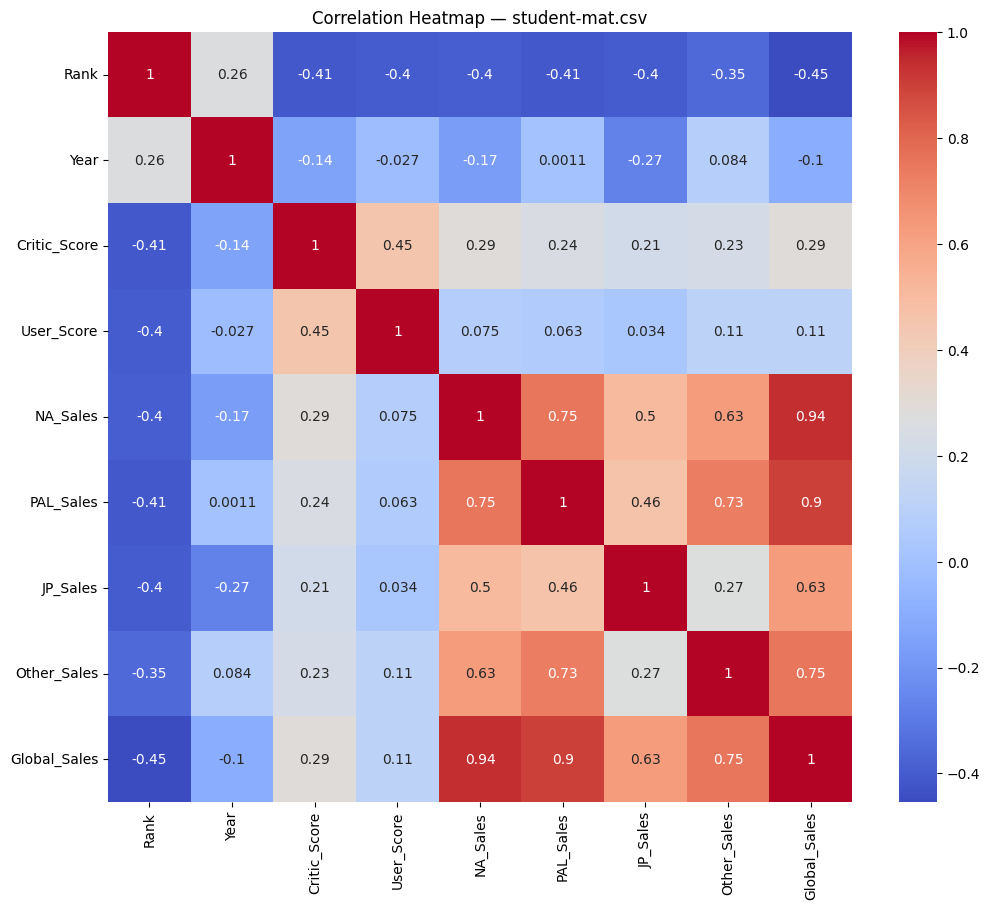

In [114]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_clean[numeric].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap — student-mat.csv")
plt.savefig('MaxShuford_HM_student-mat.png')
plt.show()


# Here we can see a correlation matrix that shows the links between all our numeric attributes

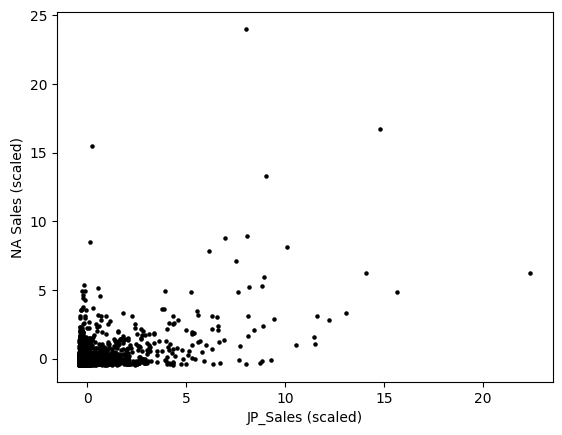

In [115]:
X = df_clean[['JP_Sales', 'NA_Sales']]

scaled = StandardScaler().fit_transform(X)

plt.scatter(scaled[:,0], scaled[:,1], c='black', s=5)
plt.xlabel("JP_Sales (scaled)")
plt.ylabel("NA Sales (scaled)")
plt.show()

### Lets scale logarithmically, that way we can see meaningful clusters 

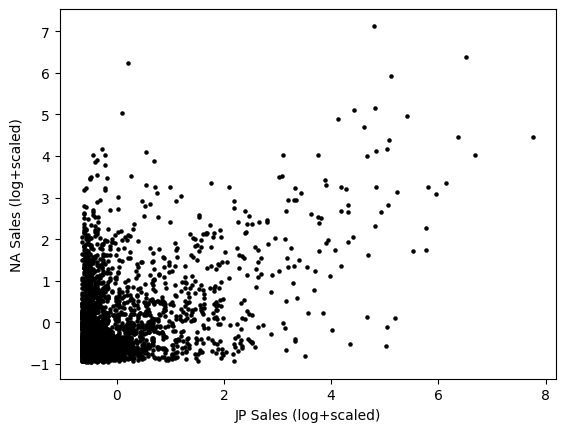

In [116]:
df_log = df_clean.copy()
features = ['JP_Sales', 'NA_Sales', 'PAL_Sales']
df_log = df[features].dropna()
df_log['JP_log'] = np.log1p(df_log['JP_Sales'])
df_log['NA_log'] = np.log1p(df_log['NA_Sales'])

X = df_log[['JP_log', 'NA_log']]
scaled = StandardScaler().fit_transform(X)

plt.scatter(scaled[:,0], scaled[:,1], s=5, c='black')
plt.xlabel("JP Sales (log+scaled)")
plt.ylabel("NA Sales (log+scaled)")
plt.show()

## Lets find our optimal K-value

In [117]:
features = ['JP_Sales', 'NA_Sales', 'PAL_Sales']
df_cluster = df[features].dropna()

for k in range(2, 11):   # silhouette needs at least k=2
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled)
    score = silhouette_score(scaled, labels)
    print(f"k={k}, silhouette score={score}")

k=2, silhouette score=0.6381764394489753
k=3, silhouette score=0.533603093915034
k=4, silhouette score=0.5624711787495446
k=5, silhouette score=0.4815768609573793
k=6, silhouette score=0.4898854048396182
k=7, silhouette score=0.45791728855708413
k=8, silhouette score=0.4530788448462291
k=9, silhouette score=0.4446052247780819
k=10, silhouette score=0.41443659566492813


In [118]:
features = ['JP_Sales', 'NA_Sales', 'PAL_Sales']
df_cluster = df[features].dropna()

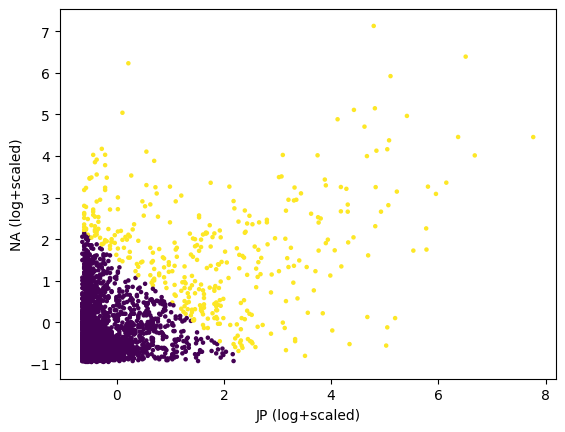

In [119]:
df_cluster['JP_log'] = np.log1p(df_cluster['JP_Sales'])
df_cluster['NA_log'] = np.log1p(df_cluster['NA_Sales'])

X = df_cluster[['JP_log', 'NA_log']]

scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(scaled)

plt.scatter(scaled[:,0], scaled[:,1], c=labels, s=5, cmap='viridis')
plt.xlabel("JP (log+scaled)")
plt.ylabel("NA (log+scaled)")
plt.savefig('JPvsNA_Sales_KMEANS.png')
plt.show()

In [102]:
features = ['PAL_Sales', 'NA_Sales']
df_cluster = df[features].dropna()

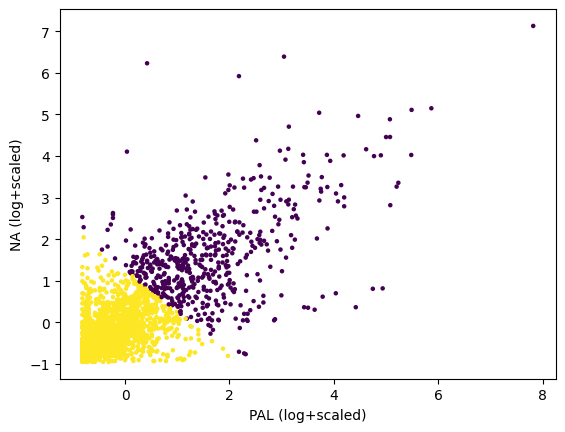

In [120]:
df_cluster['PAL_log'] = np.log1p(df_cluster['PAL_Sales'])
df_cluster['NA_log'] = np.log1p(df_cluster['NA_Sales'])

X = df_cluster[['PAL_log', 'NA_log']]

scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(scaled)

plt.scatter(scaled[:,0], scaled[:,1], c=labels, s=5, cmap='viridis')
plt.xlabel("PAL (log+scaled)")
plt.ylabel("NA (log+scaled)")
plt.savefig('PALvsNA_Sales_KMEANS.png')
plt.show()

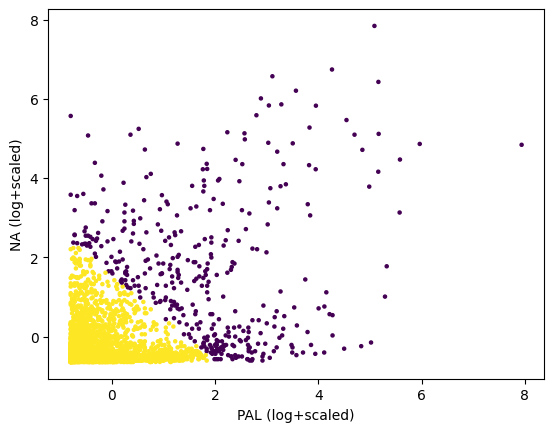

In [121]:
features = ['PAL_Sales', 'JP_Sales']
df_cluster = df[features].dropna()

df_cluster['PAL_log'] = np.log1p(df_cluster['PAL_Sales'])
df_cluster['JP_log'] = np.log1p(df_cluster['JP_Sales'])

X = df_cluster[['PAL_log', 'JP_log']]

scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(scaled)

plt.scatter(scaled[:,0], scaled[:,1], c=labels, s=5, cmap='viridis')
plt.xlabel("PAL (log+scaled)")
plt.ylabel("NA (log+scaled)")
plt.savefig('JPvsPAL_Sales_KMEANS.png')
plt.show()

## 1. Purpose

The purpose of this question was to see if we can see any grouping of sales between Japan, European, and American games sales. The purpose of these groupings was to identify the bulk games vs the outlier games and the trends between regions.

# 2. Methodology

To analyze patterns in video game performance, I began by cleaning the dataset and removing entries with missing values in the sales columns used for clustering. Since raw sales data are heavily skewed and contain extreme outliers, I applied a log transformation followed by standardization to normalize the distribution of each feature. I selected JP_Sales and NA_Sales as the primary attributes for clustering, as these regions exhibit distinct market behaviors and provide useful insight into regional demand patterns. After preprocessing, I used the K-Means algorithm and evaluated different values of k using the silhouette score to determine the optimal number of clusters. The highest silhouette score was achieved at k = 2, indicating that the dataset naturally separates into two well-defined groups. This preprocessing and evaluation pipeline allowed me to create meaningful and interpretable clusters that reflect real differences in regional game sales performance.

# 3. Results

I performed K-Means clustering using two sales regions at a time. The scatterplots of PAL vs. JP Sales, PAL vs. NA Sales, and JP vs. NA Sales all produced a consistent clustering structure, where the algorithm identified two distinct groups of video games. Across all three visualizations, the first cluster represents the large majority of titles that sell at relatively low levels across each region. The second cluster contains a much smaller subset of high-performing titles that achieve significantly stronger sales, forming a clear separation even after log scaling. This pattern suggests that sales behavior is dominated by a small number of blockbuster games that perform well across multiple regions, while the majority of games sell modestly. The consistent separation across different regional pairings reinforces that k = 2 is the most meaningful and stable number of clusters for this dataset. Overall, the clustering results effectively highlight the divide between globally successful titles and the broader market of lower-selling games.

# 4. Highlights

the K-Means algorithm consistently separated the dataset into two dominant groups. The first cluster contains the overwhelming majority of titles, characterized by low to moderate sales in each region, reflecting the typical performance of most games released on the market. In contrast, the second cluster isolates a much smaller subset of high-performing, top-selling games that achieve significantly stronger sales across multiple regions. This divide highlights the highly skewed nature of the video game industry, where only a limited number of blockbuster franchises generate large international sales while most titles remain regionally limited or modest in performance.

# Can we predict a games Global Sales based on its Regional sales

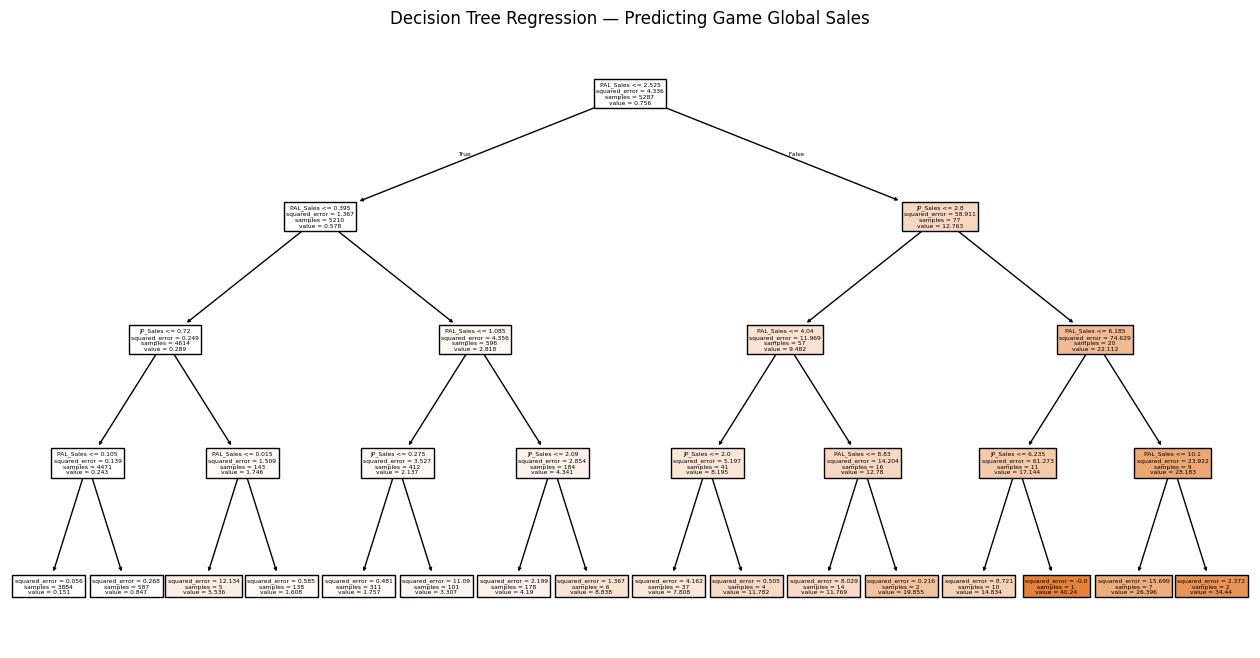

In [132]:
X = df_clean[features]
y = df_clean['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)

plt.figure(figsize=(16,8))
plot_tree(tree, feature_names=features, filled=True)
plt.title("Decision Tree Regression — Predicting Game Global Sales")
plt.savefig('Decision Tree Regression — Predicting Game Global Sales.png')
plt.show()